In [2]:

#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#read dataset
df=pd.read_csv("data_science.csv")
df.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [6]:
#exploring data

In [7]:
df.shape

(607, 12)

In [8]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [9]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
df.drop('salary', axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=Ture)



NameError: name 'Ture' is not defined

In [11]:
df.head(5)

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title salary_currency  salary_in_usd  \
0              Data Scientist             EUR          79833   
1  Machine Learning Scientist             USD         260000   
2           Big Data Engineer             GBP         109024   
3        Product Data Analyst             USD          20000   
4   Machine Learning Engineer             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

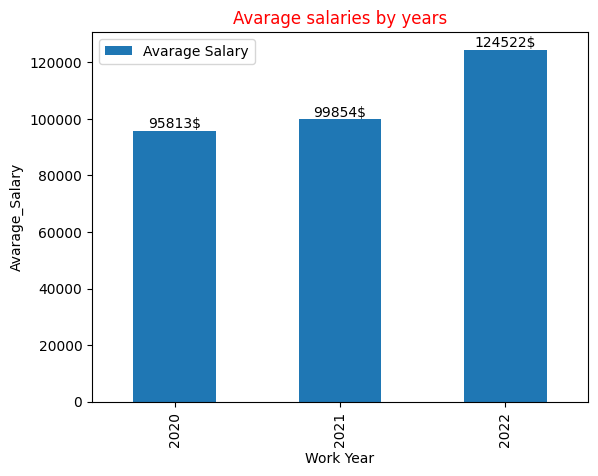

In [12]:
#groupby workyear for salary_usd and plot groub by

gb=df.groupby("work_year")["salary_in_usd"].mean()

ax=gb.plot(kind="bar",x=gb.index,y=gb.values,legend=True)
ax.bar_label(ax.containers[0],fmt='%.f$')
ax.legend(["Avarage Salary"],loc="upper left")

plt.xlabel("Work Year")
plt.ylabel("Avarage_Salary")
plt.title("Avarage salaries by years",color="red")
plt.show()

In [13]:
df2=df.remote_ratio.value_counts()
df2

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [14]:
values=df2.to_list()
print(values)

[381, 127, 99]


In [15]:
labels=["Fully remote","No remote","Hybrid"]


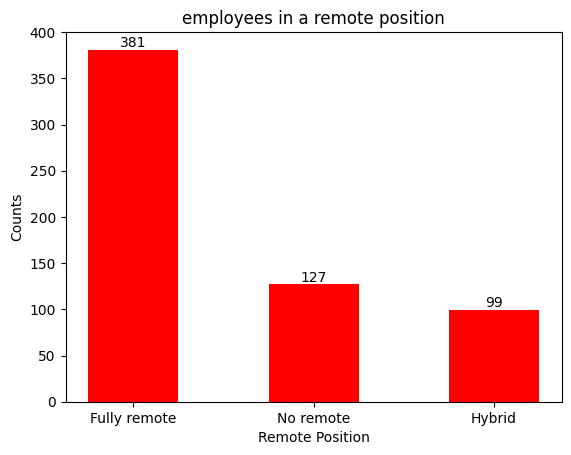

In [16]:
z=plt.bar(labels,values,width=0.5,color="red")
plt.bar_label(z,labels=values)
plt.title("employees in a remote position")
plt.ylabel("Counts")
plt.xlabel("Remote Position")
plt.show()

In [17]:
df3=df.company_size.value_counts()
df3

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [18]:
index_df3=df3.index

In [19]:
values_df3=df3.values

In [20]:
labels_legend=["Medium","Large","Small"]

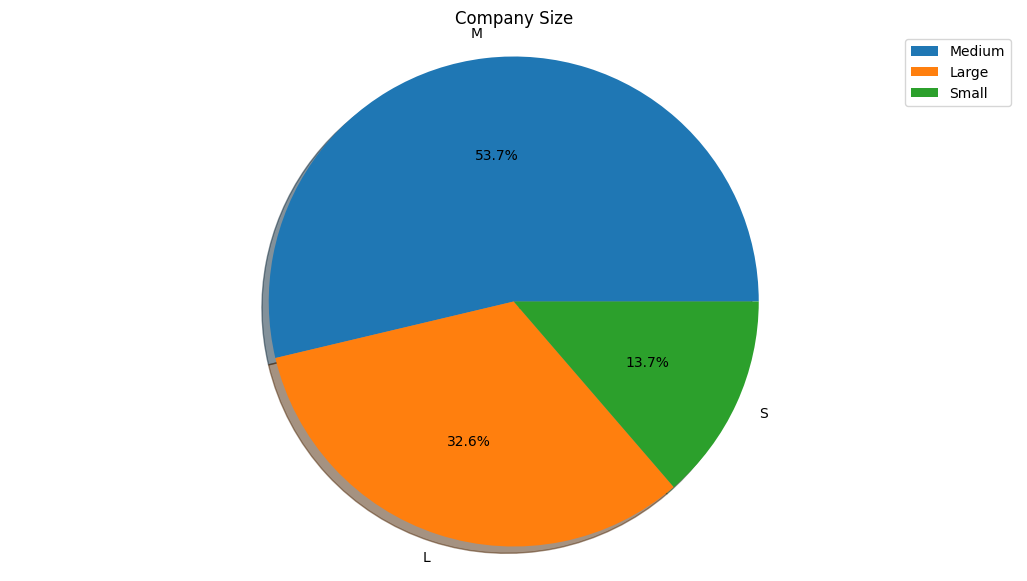

In [21]:
plt.figure(figsize=(13,7))
ax=plt.pie(x=values_df3,labels=index_df3,autopct="%1.1f%%",shadow=True)
plt.axis("equal")
plt.legend(labels=labels_legend,loc="upper right")
plt.title("Company Size")
plt.show()

In [22]:
df4=df.job_title.value_counts()[:5]
df4

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: count, dtype: int64

C:\Users\casper\AppData\Local\Temp\ipykernel_13252\3112873445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df4.index, y= df4.values,palette='viridis')


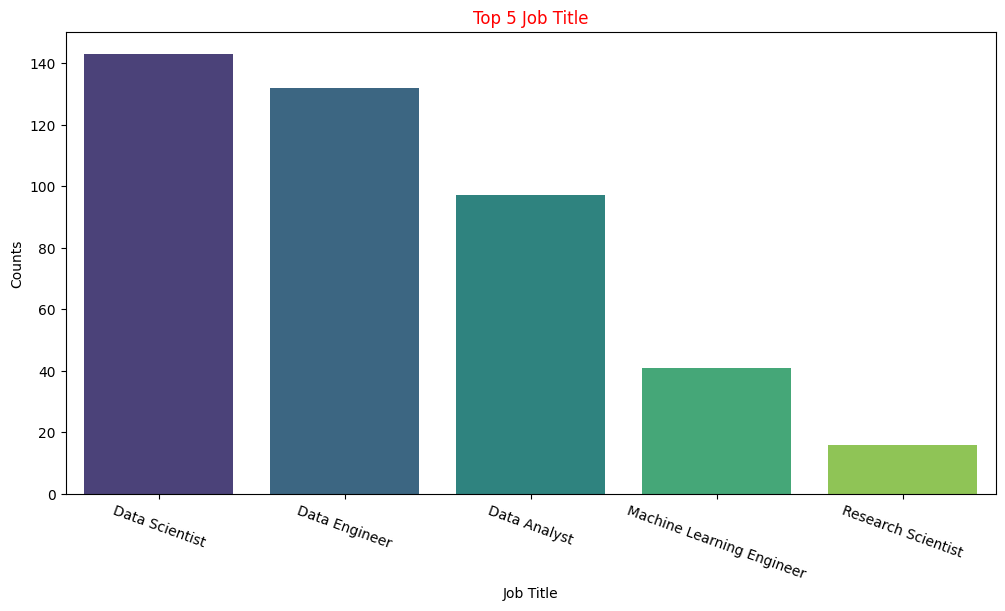

In [25]:
plt.figure(figsize=(12,6))


#plt.bar(df4.index,df4.values)

sns.barplot(x= df4.index, y= df4.values,palette='viridis')
plt.xlabel("Job Title")
plt.ylabel("Counts")
plt.title("Top 5 Job Title",color="red")
plt.xticks(rotation=-20)
plt.show()

In [33]:
df5=df[['salary_in_usd','company_size']]
df5

salary_in_usd company_size
0            79833            L
1           260000            S
2           109024            M
3            20000            S
4           150000            L
..             ...          ...
602         154000            M
603         126000            M
604         129000            M
605         150000            M
606         200000            L

[607 rows x 2 columns]

In [146]:
S_size=df5[df5['company_size']=='S']
M_size=df5[df5['company_size']=='M']
L_size=df5[df5['company_size']=='L']

labels_new=["Small","Medium","Large"]


sal_mean=[S_size['salary_in_usd'].mean(),M_size['salary_in_usd'].mean(),L_size['salary_in_usd'].mean()]





In [147]:
sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

In [148]:
label_changed=pd.Series(sal_mean).round(2)
label_changeds=label_changed/1000
lb=pd.Series(label_changeds).round(2)
lb_str=list(map(str,lb))

label_new=[x+'K' for x in lb_str]


print(label_new)

['77.63K', '116.91K', '119.24K']


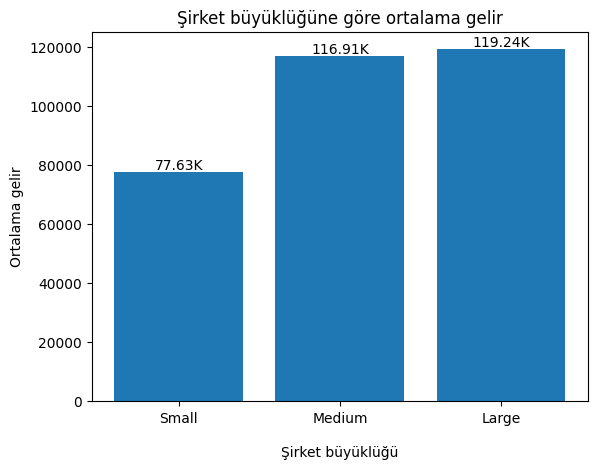

In [150]:
z=plt.bar(labels_new,sal_mean)
plt.bar_label(z,label_new,padding=0,alpha=1)
plt.title("Şirket büyüklüğüne göre ortalama gelir")
plt.xlabel("Şirket büyüklüğü",labelpad=15,fontweight=10)
plt.ylabel("Ortalama gelir")
plt.show()

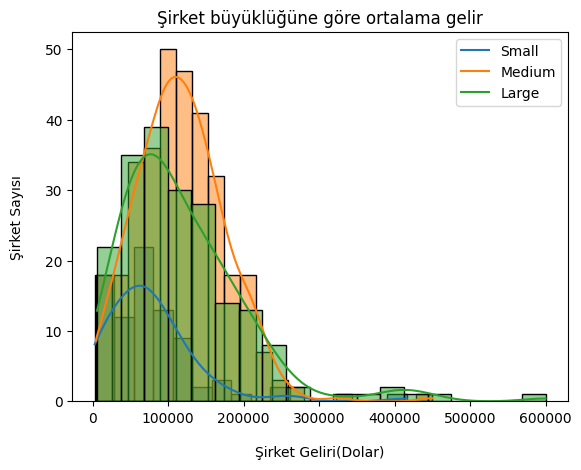

In [151]:
# şirketlerin dolar bazında gelirlerine göre bir histogram grafiği(seaborn)

labels_legend=["Small","Medium","Large"]

sns.histplot(S_size['salary_in_usd'],label="Small",kde=True)
sns.histplot(M_size['salary_in_usd'],label="Medium",kde=True)
sns.histplot(L_size['salary_in_usd'],label="Large",kde=True)


plt.title("Şirket büyüklüğüne göre ortalama gelir")
plt.xlabel("Şirket Geliri(Dolar)",labelpad=15,)
plt.ylabel("Şirket Sayısı",labelpad=15,)
plt.legend(labels=labels_legend,loc="upper right")
plt.show()

In [123]:
exp_rep= {
    'SE':'Senior',
    'MI':'Middle',
    'EN':'Entry Level',
    'EX':'Executive'
}

df['experience_level'].replace(exp_rep,inplace=True)

In [125]:
df['experience_level'].value_counts()

experience_level
Senior         280
Middle         213
Entry Level     88
Executive       26
Name: count, dtype: int64

In [137]:
df6=df['experience_level'].value_counts()
df6
df6.index

Index(['Senior', 'Middle', 'Entry Level', 'Executive'], dtype='object', name='experience_level')

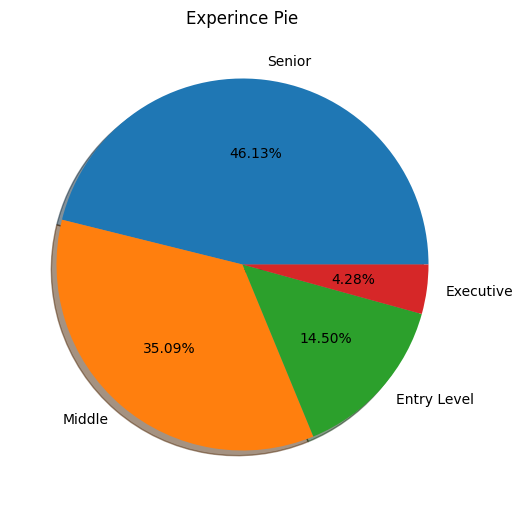

In [139]:
plt.figure(figsize=(6,12))
plt.pie(x=df6.values,labels=df6.index,autopct='%1.2f%%',shadow=True)
plt.title('Experince Pie')
plt.show()